In [1]:
#内嵌画图
%matplotlib inline

import torch
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.utils.data.dataloader as Data
import torch.nn as nn
from torchvision import models
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tools import show_images_diff

In [2]:
adam_original_loss = []
sdg_original_loss=[]
RMSprop_original_loss=[]
epoch_range=[]

torch.Size([1, 3, 224, 224])
label=388


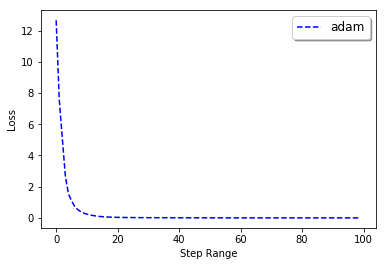

(3, 224, 224)
l0=141216 l2=68667.92521985792


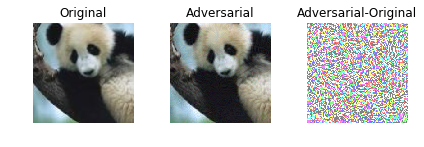

In [3]:
def run_adam_opt():
    #获取计算设备 默认是CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    #图像加载以及预处理
    image_path="../picture/cropped_panda.jpg"
    orig = cv2.imread(image_path)[..., ::-1]
    orig = cv2.resize(orig, (224, 224))
    img = orig.copy().astype(np.float32)

    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img /= 255.0
    img = (img - mean) / std
    img = img.transpose(2, 0, 1)

    img=np.expand_dims(img, axis=0)

    img = Variable(torch.from_numpy(img).to(device).float())
    print(img.shape)

    #使用预测模式 主要影响droupout和BN层的行为
    model = models.alexnet(pretrained=True).to(device).eval()

    label=np.argmax(model(img).data.cpu().numpy())
    print("label={}".format(label))

    #图像数据梯度可以获取
    img.requires_grad = True

    #设置为不保存梯度值 自然也无法修改
    for param in model.parameters():
        param.requires_grad = False

    optimizer = torch.optim.Adam([img],lr = 0.01)
    loss_func = torch.nn.CrossEntropyLoss()

    epochs=100

    target=288
    target=Variable(torch.Tensor([float(target)]).to(device).long())
    
    global adam_original_loss
    original_loss = []
    global epoch_range
    epoch_range=[]

    for epoch in range(epochs):
        # 梯度清零
        optimizer.zero_grad()

        # forward + backward
        output = model(img)

        loss = loss_func(output, target)
        label=np.argmax(output.data.cpu().numpy())

        #print("epoch={} loss={} label={}".format(epoch,loss,label))
        
        original_loss += [loss]
        adam_original_loss+=[loss]
        epoch_range += [epoch]
        
        loss.backward()
        optimizer.step()
        
    
    fig, ax = plt.subplots()
    ax.plot(np.array(epoch_range), np.array(original_loss), 'b--', label='adam')


    legend = ax.legend(loc='best', shadow=True, fontsize='large')
    legend.get_frame().set_facecolor('#FFFFFF')

    plt.xlabel('Step Range')
    plt.ylabel('Loss')
    plt.show()
    
        
    adv=img.data.cpu().numpy()[0]
    print(adv.shape)
    adv = adv.transpose(1, 2, 0)
    adv = (adv * std) + mean
    adv = adv * 255.0
    #adv = adv[..., ::-1]  # RGB to BGR
    adv = np.clip(adv, 0, 255).astype(np.uint8)

    show_images_diff(orig,388,adv,target.data.cpu().numpy()[0])

run_adam_opt()        

torch.Size([1, 3, 224, 224])
label=388
(3, 224, 224)
l0=75342 l2=69544.14607283636


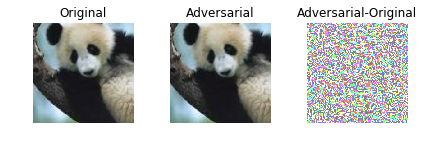

In [4]:
def run_sgd_opt():
    #获取计算设备 默认是CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    #图像加载以及预处理
    image_path="../picture/cropped_panda.jpg"
    orig = cv2.imread(image_path)[..., ::-1]
    orig = cv2.resize(orig, (224, 224))
    img = orig.copy().astype(np.float32)

    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img /= 255.0
    img = (img - mean) / std
    img = img.transpose(2, 0, 1)

    img=np.expand_dims(img, axis=0)

    img = Variable(torch.from_numpy(img).to(device).float())
    print(img.shape)

    #使用预测模式 主要影响droupout和BN层的行为
    model = models.alexnet(pretrained=True).to(device).eval()

    label=np.argmax(model(img).data.cpu().numpy())
    print("label={}".format(label))

    #图像数据梯度可以获取
    img.requires_grad = True

    #设置为不保存梯度值 自然也无法修改
    for param in model.parameters():
        param.requires_grad = False

    optimizer = torch.optim.SGD([img],lr = 0.01)
    loss_func = torch.nn.CrossEntropyLoss()

    epochs=100

    target=288
    target=Variable(torch.Tensor([float(target)]).to(device).long())
    
    global sdg_original_loss
    global epoch_range
    epoch_range=[]
    

    for epoch in range(epochs):
        # 梯度清零
        optimizer.zero_grad()

        # forward + backward
        output = model(img)

        loss = loss_func(output, target)
        label=np.argmax(output.data.cpu().numpy())

        #print("epoch={} loss={} label={}".format(epoch,loss,label))
        
        sdg_original_loss += [loss]
        epoch_range += [epoch]

        loss.backward()
        optimizer.step()
        

        
    adv=img.data.cpu().numpy()[0]
    print(adv.shape)
    adv = adv.transpose(1, 2, 0)
    adv = (adv * std) + mean
    adv = adv * 255.0
    #adv = adv[..., ::-1]  # RGB to BGR
    adv = np.clip(adv, 0, 255).astype(np.uint8)

    show_images_diff(orig,388,adv,target.data.cpu().numpy()[0])

run_sgd_opt()        

torch.Size([1, 3, 224, 224])
label=388
(3, 224, 224)
l0=142145 l2=68278.40714310785


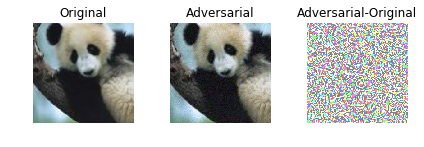

In [6]:
def run_RMSprop_opt():
    #获取计算设备 默认是CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    #图像加载以及预处理
    image_path="../picture/cropped_panda.jpg"
    orig = cv2.imread(image_path)[..., ::-1]
    orig = cv2.resize(orig, (224, 224))
    img = orig.copy().astype(np.float32)

    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img /= 255.0
    img = (img - mean) / std
    img = img.transpose(2, 0, 1)

    img=np.expand_dims(img, axis=0)

    img = Variable(torch.from_numpy(img).to(device).float())
    print(img.shape)

    #使用预测模式 主要影响droupout和BN层的行为
    model = models.alexnet(pretrained=True).to(device).eval()

    label=np.argmax(model(img).data.cpu().numpy())
    print("label={}".format(label))

    #图像数据梯度可以获取
    img.requires_grad = True

    #设置为不保存梯度值 自然也无法修改
    for param in model.parameters():
        param.requires_grad = False

    optimizer = torch.optim.RMSprop([img],lr = 0.01)
    loss_func = torch.nn.CrossEntropyLoss()

    epochs=100

    target=288
    target=Variable(torch.Tensor([float(target)]).to(device).long())
    
    #epoch_range = range(epochs)
    global RMSprop_original_loss 
    global epoch_range
    epoch_range=[]

    for epoch in range(epochs):
        # 梯度清零
        optimizer.zero_grad()

        # forward + backward
        output = model(img)

        loss = loss_func(output, target)
        label=np.argmax(output.data.cpu().numpy())

        #print("epoch={} loss={} label={}".format(epoch,loss,label))
        
        RMSprop_original_loss += [loss]
        epoch_range += [epoch]

 
        loss.backward()
        optimizer.step()
        
    
    
    
        
    adv=img.data.cpu().numpy()[0]
    print(adv.shape)
    adv = adv.transpose(1, 2, 0)
    adv = (adv * std) + mean
    adv = adv * 255.0
    #adv = adv[..., ::-1]  # RGB to BGR
    adv = np.clip(adv, 0, 255).astype(np.uint8)

    show_images_diff(orig,388,adv,target.data.cpu().numpy()[0])

run_RMSprop_opt()        

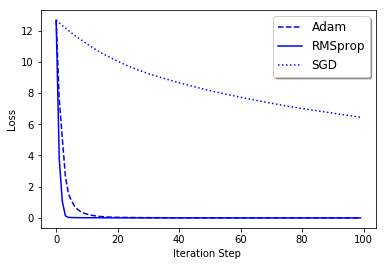

In [15]:
fig, ax = plt.subplots()
ax.plot(np.array(epoch_range), np.array(adam_original_loss), 'b--', label='Adam')
ax.plot(np.array(epoch_range), np.array(RMSprop_original_loss), 'b-', label='RMSprop')
ax.plot(np.array(epoch_range), np.array(sdg_original_loss), 'b:', label='SGD')


legend = ax.legend(loc='best', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#FFFFFF')

plt.xlabel('Iteration Step ')
plt.ylabel('Loss')
plt.show()